In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
df = pd.read_csv('pima_indians-diabetes.csv')


In [4]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
x = df.drop('class', axis=1)
y = df['class']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
param_grad = {'n_neighbors': list(range(1,9)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
gs = GridSearchCV(knn, param_grad, cv=10)
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [12]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [13]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

In [14]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [15]:
gs.cv_results_['mean_test_score']

array([0.68016327, 0.69257143, 0.70053061, 0.72089796, 0.71473469,
       0.73106122, 0.73502041, 0.72489796, 0.68016327, 0.69257143,
       0.70053061, 0.72089796, 0.71473469, 0.73106122, 0.73502041,
       0.72489796, 0.68016327, 0.69257143, 0.70053061, 0.72089796,
       0.71473469, 0.73106122, 0.73502041, 0.72489796, 0.68016327,
       0.69257143, 0.70053061, 0.72089796, 0.71473469, 0.73106122,
       0.73502041, 0.72489796])

In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=7, algorithm='auto')
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
from sklearn import metrics

y_pred = knn_clf.predict(x_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7597402597402597


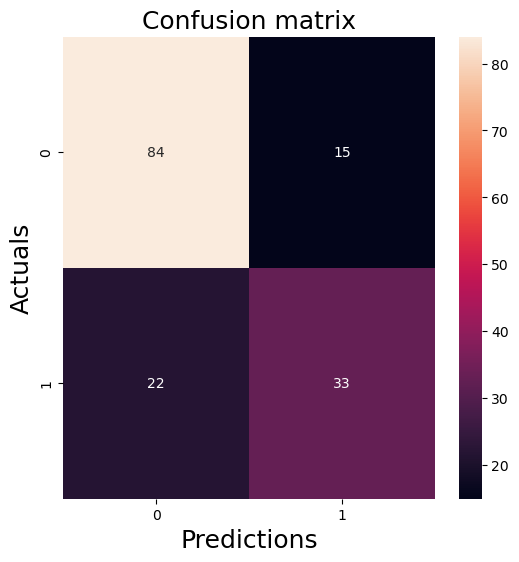

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
import seaborn as sns

sns.heatmap(confusion_matrix, annot= True)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion matrix', fontsize=18)

plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

